In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
pd.options.mode.chained_assignment = None 

In [2]:
import os
import sys

In [3]:
sys.path.append(os.path.join(os.path.dirname("__FILE__"), 'utils'))

In [4]:
from functions import *

In [5]:
cw_d = "./dataset/inputs/"

In [6]:
arvi_df = pd.read_csv(cw_d + "arvi.csv")

In [7]:
arvi_df.columns = ["date", "ARVI"]

In [8]:
arvi_df.head()

,date,ARVI
0,7-Jan-18,1.017
1,12-Jan-18,1.026
2,14-Jan-18,1.325
3,24-Jan-18,0.924
4,27-Jan-18,0.999


In [9]:
arvi_dates_formated = [datetime.strptime(d ,"%d-%b-%y") for d in list(arvi_df.date)]

In [10]:
arvi_df.date = arvi_dates_formated 

In [11]:
arvi_df = arvi_df.sort_values(by="date")

In [12]:
arvi_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(arvi_df.date)]
arvi_df["date_intervals"] = arvi_dates_col
arvi_df.head()

,date,ARVI,date_intervals
0,2018-01-07,1.017,2018-01-16
1,2018-01-12,1.026,2018-01-16
2,2018-01-14,1.325,2018-01-16
3,2018-01-24,0.924,2018-01-17
4,2018-01-27,0.999,2018-01-17


In [13]:
arvi_years = [d.year for d in  list(arvi_df.date)]
arvi_df["years"] =arvi_years

In [14]:
grouped_arvi = arvi_df.groupby(["date_intervals"])[["ARVI"]].mean()
grouped_arvi = grouped_arvi.reset_index()

In [15]:
intervals = list(grouped_arvi["date_intervals"])
new_inter = []

for d in intervals:
    new_inter.append(rename_intervals(1, 16, d, d.month))

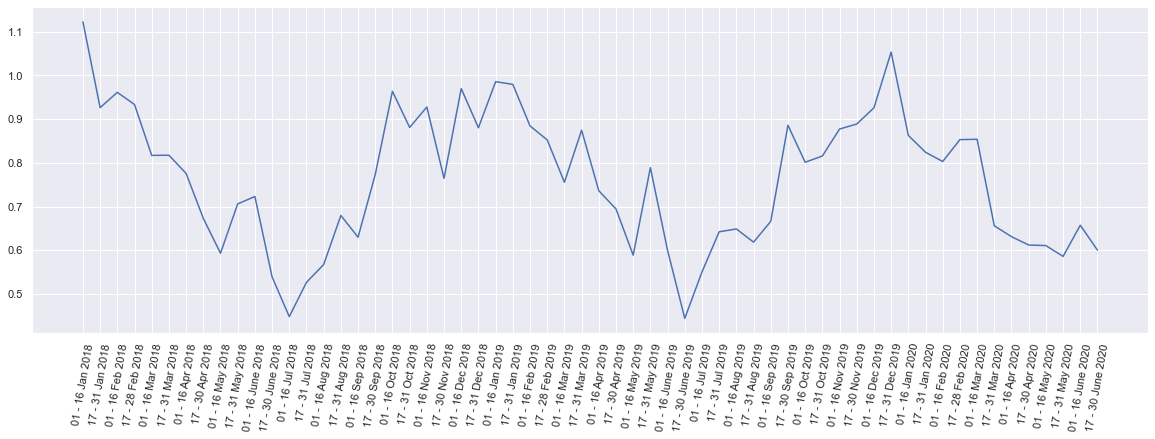

In [16]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
x_pos = np.arange(len(new_inter))
_ = ax.plot(list(grouped_arvi["ARVI"]))
ax.set_xticks(x_pos)
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(new_inter,  rotation = 80)